In [1]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None) # don't truncate cell contents

from df_utils import *

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = Path('/srv/scratch6/kew/bart/hospo_respo/en/data/hotel/500k')
scored_data = ['trip_hotels.pkl', 'trip_hotels.gen_sts_scores.pkl', 'trip_hotels.response_ppl_scores.pkl', 'trip_hotels.zipf_dist_scores.pkl']

In [3]:
df = pd.concat([pd.read_pickle(data_dir / f) for f in scored_data], axis=1)
print(len(df))
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.columns)

500000
Index(['domain', 'rating', 'review_author', 'response_author', 'review_clean',
       'response_clean', 'sentiment', 'db_internal_id', 'establishment',
       'trip_id', 'trip_url', 'country', 'split',
       'score:review_response_length_ratio', 'score:response_sentence_length',
       'score:genericness_semantic_avg', 'score:genericness_length_ratio',
       'score:review_response_wmd', 'rrgen_id',
       'score:genericness_sent_level_sts_avg', 'score:response_text_ppl',
       'score:response_freq_distro_ratio'],
      dtype='object')


In [1]:
df

NameError: name 'df' is not defined

In [5]:
df['score:response_text_ppl'].describe()

count    500000.000000
mean         30.227169
std          62.865044
min           2.619564
25%          16.842829
50%          23.890131
75%          34.940752
max       34380.269531
Name: score:response_text_ppl, dtype: float64

<AxesSubplot:xlabel='score:response_text_ppl', ylabel='Density'>

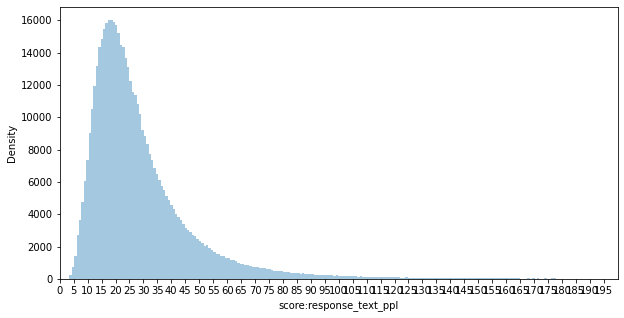

In [29]:
plt.figure(figsize=(10,5))
# plt.title('Availability & Price')
# plt.xlabel('Availability')
# plt.ylabel('Price')
# sns.scatterplot(df['score:response_text_ppl'])
plt.xlim(0,200)
plt.xticks(list(range(0, 200, 5)))
plt.xlabel('Price')
plt.ylabel('Density')

sns.distplot(df['score:response_text_ppl'],bins=40000,kde=False)


In [7]:
def categorise_scores(score):
    if score < 16.0:
        return 'ppl_0:'
    elif score < 24:
        return 'ppl_1:'
    elif score < 32.0:
        return 'ppl_2:'
    elif score < 40.0:
        return 'ppl_3:'
    elif score < 48.0:
        return 'ppl_4:'
    else:
        return 'ppl_5:'
    
def bin_scores(df, col_name):
    print(df[col_name].describe())    
    df[col_name+'_CAT'] = df[col_name].apply(categorise_scores)
    print(df[col_name+'_CAT'].describe())
    return df

In [8]:
df = bin_scores(df, 'score:response_text_ppl')

count    500000.000000
mean         30.227169
std          62.865044
min           2.619564
25%          16.842829
50%          23.890131
75%          34.940752
max       34380.269531
Name: score:response_text_ppl, dtype: float64
count     500000
unique         6
top        ppl_1
freq      142275
Name: score:response_text_ppl_CAT, dtype: object


In [9]:
# df[~df['score:response_text_ppl_CAT'].notna()]

In [10]:
# sns.distplot(df['score:response_text_ppl_CAT'],bins=10,kde=False)

In [11]:
df

,domain,rating,review_author,response_author,review_clean,response_clean,sentiment,db_internal_id,establishment,trip_id,trip_url,country,split,score:review_response_length_ratio,score:response_sentence_length,score:genericness_semantic_avg,score:genericness_length_ratio,score:review_response_wmd,rrgen_id,score:genericness_sent_level_sts_avg,score:response_text_ppl,score:response_freq_distro_ratio,score:response_text_ppl_CAT
0,Hotel,5,Lucy J,RCCharlotte,Fantastic! ---SEP--- We were treated like royalty during our stay. We actually live in Charlotte but stayed here during a two day event uptown in Charlotte. Staff incredible detail oriented and friendly. Superior service everywhere we looked! Prices are high but you get what you okay for. It was truly a pleasure to stay at such a high quality hotel. Would recommend to everyone!,"Dear Lucy J, Thank you for sharing your experience with the Trip Advisor community. I am thrilled you enjoyed the amenities and services during your visit to Uptown. Again, thank you for taking the time to write such a lovely review about the hotel. We look forward to welcoming you back in the near future. Sincerely, David Rothwell General Manager",3 -1 3,126080,"The Ritz-Carlton, Charlotte",1510383,https://www.tripadvisor.com/Hotel_Review-g49022-or530-d1510383-Reviews-The_Ritz_Carlton_Charlotte-Charlotte_North_Carolina.html,US,train,1.600000,5,0.879500,0.400000,4.637085,2329375,0.784991,9.477049,0.940299,ppl_0
1,Hotel,4,OYEWOLE O,CPHIEXManagementTeam,"Convenient ---SEP--- The hotel is custom-made for a traveller in transit or anyone who wants to avoid the hassle of catching a flight at Heathrow's Terminal 4 in good time. A tunnel links the hotel to the terminal. From your room, you simply check out and drag your luggage through the tunnel to the departure hall. No hassles. The hotel is clean and the staff are quite friendly and helpful. Next door is the Holiday Inn which shares common elevator with Crowne Plaza. You can have the best of two worlds by also sampling the offerings in the hotel next door. Nice place!","Dear OYEWOLE O, Thank you for your kind feedback and for choosing The New Crowne Plaza at London Heathrow T4. We are delighted to understand that you found our hotel to be convenient for your journey through London Heathrow Airport. We will share your most positive comments with our dedicated team. Thank you once again and we look forward to welcoming you in the future. Warm Regards, Andrew Brown. General Manager Crowne Plaza London Heathrow T4.",2 -2 2,147558,Crowne Plaza London Heathrow T4,14151392,https://www.tripadvisor.co.uk/Hotel_Review-g528813-or495-d14151392-Reviews-Crowne_Plaza_London_Heathrow_T4-Hounslow_Greater_London_England.html,UK,train,1.333333,6,0.829168,0.166667,4.310637,2770320,0.723620,16.972458,0.880952,ppl_1
2,Hotel,4,Jeff M,fairholminnkeeper,"Authentic house, authentic people ---SEP--- Stayed for two nights, my wife and I - her sister and husband who are from Vancouver. all of us approx 60. He wanted an authentic historical setting, plus king bed, etc. We have done a lot of B & B's in Maine over the years so less of an issue for us. I called about a month ahead and they only had one King Bedroom left in the main house, but they had just redone their Coachhouse on the same property so inlaws in main house, my wife and I in Coach house. King Room was the real thing, king bed, propane fireplace, spacious. only modern was bathroom which was redone but with fixtures with a traditional look. very nice. Our 'room' was a one-bedroom apt, very modern looking, open kitchen (fully equiped) king bed, 2 TVs. could have stayed a month and been quite comfortable. Breakfast was two choices which varied each morning (i.e. eggs benedict), plus a yoghurt with fruit and granola, and baked goods. Very pleasant staff who went out of their way to share local knowledge. SIMPLY NICE PEOPLE. Location was in residential area, about three blocks from the waterfront and two blocks from one of the to

In [13]:
df['review_clean_labeled'] = df['score:response_text_ppl_CAT'] + ': ' + df['review_clean']
df

,domain,rating,review_author,response_author,review_clean,response_clean,sentiment,db_internal_id,establishment,trip_id,trip_url,country,split,score:review_response_length_ratio,score:response_sentence_length,score:genericness_semantic_avg,score:genericness_length_ratio,score:review_response_wmd,rrgen_id,score:genericness_sent_level_sts_avg,score:response_text_ppl,score:response_freq_distro_ratio,score:response_text_ppl_CAT,review_clean_labeled
0,Hotel,5,Lucy J,RCCharlotte,Fantastic! ---SEP--- We were treated like royalty during our stay. We actually live in Charlotte but stayed here during a two day event uptown in Charlotte. Staff incredible detail oriented and friendly. Superior service everywhere we looked! Prices are high but you get what you okay for. It was truly a pleasure to stay at such a high quality hotel. Would recommend to everyone!,"Dear Lucy J, Thank you for sharing your experience with the Trip Advisor community. I am thrilled you enjoyed the amenities and services during your visit to Uptown. Again, thank you for taking the time to write such a lovely review about the hotel. We look forward to welcoming you back in the near future. Sincerely, David Rothwell General Manager",3 -1 3,126080,"The Ritz-Carlton, Charlotte",1510383,https://www.tripadvisor.com/Hotel_Review-g49022-or530-d1510383-Reviews-The_Ritz_Carlton_Charlotte-Charlotte_North_Carolina.html,US,train,1.600000,5,0.879500,0.400000,4.637085,2329375,0.784991,9.477049,0.940299,ppl_0,ppl_0: Fantastic! ---SEP--- We were treated like royalty during our stay. We actually live in Charlotte but stayed here during a two day event uptown in Charlotte. Staff incredible detail oriented and friendly. Superior service everywhere we looked! Prices are high but you get what you okay for. It was truly a pleasure to stay at such a high quality hotel. Would recommend to everyone!
1,Hotel,4,OYEWOLE O,CPHIEXManagementTeam,"Convenient ---SEP--- The hotel is custom-made for a traveller in transit or anyone who wants to avoid the hassle of catching a flight at Heathrow's Terminal 4 in good time. A tunnel links the hotel to the terminal. From your room, you simply check out and drag your luggage through the tunnel to the departure hall. No hassles. The hotel is clean and the staff are quite friendly and helpful. Next door is the Holiday Inn which shares common elevator with Crowne Plaza. You can have the best of two worlds by also sampling the offerings in the hotel next door. Nice place!","Dear OYEWOLE O, Thank you for your kind feedback and for choosing The New Crowne Plaza at London Heathrow T4. We are delighted to understand that you found our hotel to be convenient for your journey through London Heathrow Airport. We will share your most positive comments with our dedicated team. Thank you once again and we look forward to welcoming you in the future. Warm Regards, Andrew Brown. General Manager Crowne Plaza London Heathrow T4.",2 -2 2,147558,Crowne Plaza London Heathrow T4,14151392,https://www.tripadvisor.co.uk/Hotel_Review-g528813-or495-d14151392-Reviews-Crowne_Plaza_London_Heathrow_T4-Hounslow_Greater_London_England.html,UK,train,1.333333,6,0.829168,0.166667,4.310637,2770320,0.723620,16.972458,0.880952,ppl_1,"ppl_1: Convenient ---SEP--- The hotel is custom-made for a traveller in transit or anyone who wants to avoid the hassle of catching a flight at Heathrow's Terminal 4 in good time. A tunnel links the hotel to the terminal. From your room, you simply check out and drag your luggage through the tunnel to the departure hall. No hassles. The hotel is clean and the staff are quite friendly and helpful. Next door is the Holiday Inn which shares common elevator with Crowne Plaza. You can have the best of two worlds by also sampling the offerings in the hotel next door. Nice place!"
2,Hotel,4,Jeff M,fairholminnkeeper,"Authentic house, authentic people ---SEP--- Stayed for two nights, my wife and I - her sister and husband who are from Vancouver. all of us approx 60. He wante

In [14]:
df['review_clean'] = df['review_clean_labeled']

In [15]:
# # Fairseq (useful columns line-aligned)
OUTPATH = Path(f'/srv/scratch6/kew/bart/hospo_respo/en/data/hotel/labeled_tgt_ppl')
# OUTPATH.mkdir(parents=True, exist_ok=False)
generate_fairseq_input_files(df, OUTPATH, col_name_outfile_mapping, 'split')


train split has length: 450367
valid split has length: 24897
test split has length: 24736
Done!
